In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [60]:
fraud_data = pd.read_csv('E:/Ravi_ExcelR_Assignments/DecisionTree/Fraud_check.csv')  
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [61]:
fraud_data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [62]:
label_encoder = preprocessing.LabelEncoder()
fraud_data['Taxable.Income']= label_encoder.fit_transform(fraud_data['Taxable.Income']<=30000) 

In [63]:
#filling categorical variable with dummy values
fraud_data=pd.get_dummies(fraud_data,columns=['Undergrad','Marital.Status','Urban']) 
fraud_data 

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,0,50047,10,1,0,0,0,1,0,1
1,0,134075,18,0,1,1,0,0,0,1
2,0,160205,30,1,0,0,1,0,0,1
3,0,193264,15,0,1,0,0,1,0,1
4,0,27533,28,1,0,0,1,0,1,0
5,0,116382,0,1,0,1,0,0,1,0
6,0,80890,8,1,0,1,0,0,0,1
7,0,131253,3,0,1,0,0,1,0,1
8,0,102481,12,1,0,0,0,1,0,1
9,0,155482,4,0,1,1,0,0,0,1


In [64]:
x=fraud_data.iloc[:,1:]

In [65]:
x 

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
5,116382,0,1,0,1,0,0,1,0
6,80890,8,1,0,1,0,0,0,1
7,131253,3,0,1,0,0,1,0,1
8,102481,12,1,0,0,0,1,0,1
9,155482,4,0,1,1,0,0,0,1


In [66]:
y=fraud_data['Taxable.Income']

In [67]:
y
pd.set_option("display.max_rows", None) 

In [68]:
y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     1
11     0
12     1
13     0
14     0
15     0
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     0
26     0
27     0
28     1
29     0
30     0
31     0
32     0
33     0
34     1
35     0
36     1
37     0
38     1
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     1
49     0
50     0
51     0
52     0
53     1
54     0
55     1
56     0
57     0
58     1
59     0
60     0
61     1
62     0
63     0
64     0
65     0
66     0
67     0
68     1
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     1
80     0
81     0
82     0
83     0
84     0
85     1
86     0
87     1
88     0
89     1
90     0
91     0
92     0
93     1
94     1
95     0
96     1
97     0
98     1
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    0
108    0
109    0
110    1
1

In [69]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

In [70]:
#Building Decision Tree Classifier using Entropy criteria
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(167.40000000000003, 190.26, 'X[0] <= 63983.0\nentropy = 0.722\nsamples = 480\nvalue = [384, 96]'),
 Text(100.44000000000001, 135.9, 'X[1] <= 23.5\nentropy = 0.537\nsamples = 106\nvalue = [93, 13]'),
 Text(66.96000000000001, 81.53999999999999, 'X[0] <= 40128.5\nentropy = 0.635\nsamples = 81\nvalue = [68, 13]'),
 Text(33.480000000000004, 27.180000000000007, 'entropy = 0.811\nsamples = 36\nvalue = [27, 9]'),
 Text(100.44000000000001, 27.180000000000007, 'entropy = 0.433\nsamples = 45\nvalue = [41, 4]'),
 Text(133.92000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(234.36, 135.9, 'X[0] <= 64532.5\nentropy = 0.764\nsamples = 374\nvalue = [291, 83]'),
 Text(200.88000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(267.84000000000003, 81.53999999999999, 'X[5] <= 0.5\nentropy = 0.756\nsamples = 372\nvalue = [291, 81]'),
 Text(234.36, 27.180000000000007, 'entropy = 0.691\nsamples = 254\nvalue = [207, 47]'),
 Text(301.

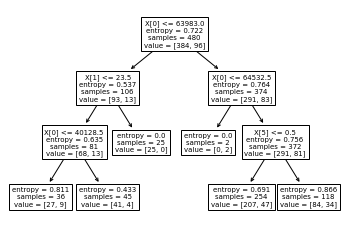

In [71]:
#PLot the decision tree
tree.plot_tree(model)

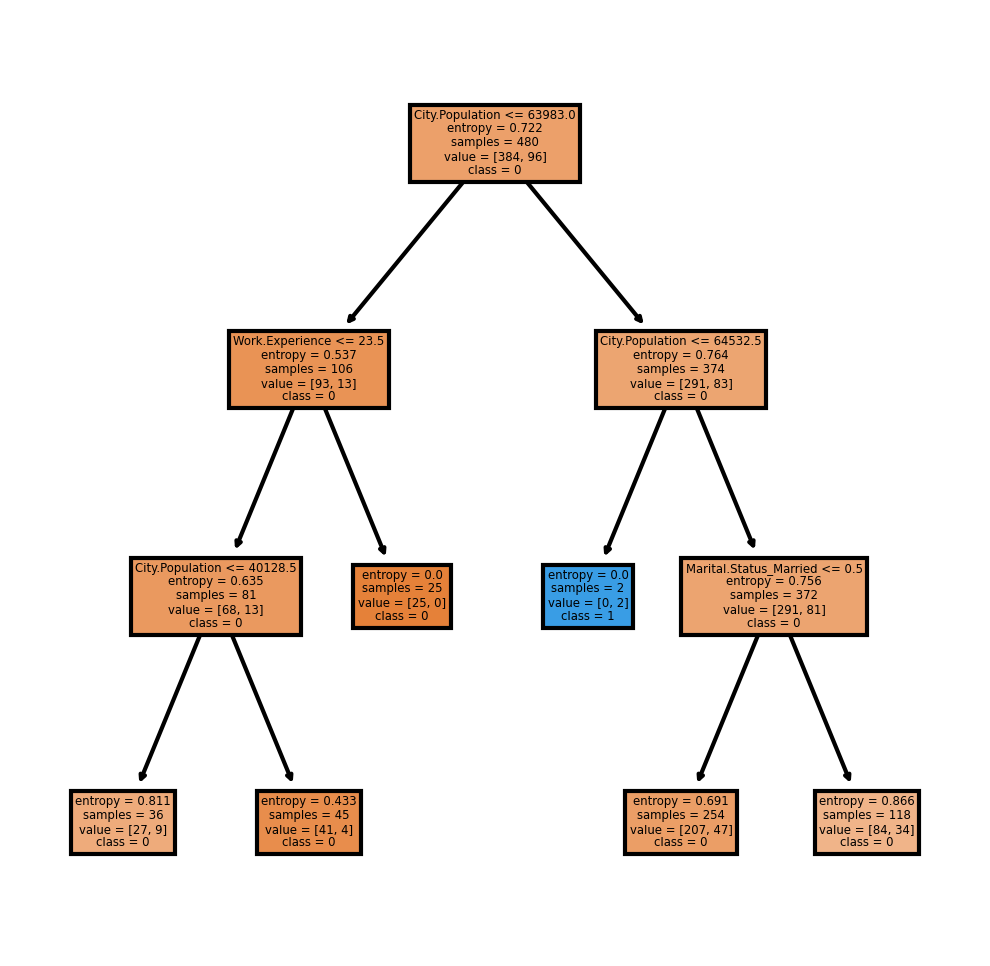

In [72]:
fn=['City.Population','Work.Experience','Undergrad_NO','Undergrad_YES','Marital.Status_Divorced','Marital.Status_Married','Marital.Status_Single','	Urban_NO','	Urban_YES']
cn=['0','1'] 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
              class_names=cn,
              filled = True); 

In [73]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

0    120
dtype: int64

In [74]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [75]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0
Taxable.Income,
0,92
1,28


In [76]:
# Accuracy 
np.mean(preds==y_test)

0.7666666666666667

In [77]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [78]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [79]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test) 

0.7666666666666667